In [3]:
import pandas as pd

file_path = (r'C:\Users\ADDIS\Desktop\3mtt\covid_19_clean_complete.csv')
df = pd.read_csv(file_path)

df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,1/22/2020,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,1/22/2020,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,1/22/2020,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,1/22/2020,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,1/22/2020,0,0,0,0,Africa


In [5]:
df.info()

# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Get summary statistics
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB
Missing Values:
 Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64


,Lat,Long,Confirmed,Deaths,Recovered,Active
count,49068.000000,49068.000000,4.906800e+04,49068.000000,4.906800e+04,4.906800e+04
mean,21.433730,23.528236,1.688490e+04,884.179160,7.915713e+03,8.085012e+03
std,24.950320,70.442740,1.273002e+05,6313.584411,5.480092e+04,7.625890e+04
min,-51.796300,-135.000000,0.000000e+00,0.000000,0.000000e+00,-1.400000e+01
25%,7.873054,-15.310100,4.000000e+00,0.000000,0.000000e+00,0.000000e+00
50%,23.634500,21.745300,1.680000e+02,2.000000,2.900000e+01,2.600000e+01
75%,41.204380,80.771797,1.518250e+03,30.000000,6.660000e+02,6.060000e+02
max,71.706900,178.065000,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06


In [7]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Drop rows with missing values in essential columns (if any)
df.dropna(subset=['Date', 'Country/Region', 'Confirmed', 'Deaths', 'Recovered'], inplace=True)

# Remove duplicates
df.drop_duplicates(inplace=True)

# Confirm cleaning steps
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  14664 non-null  object        
 1   Country/Region  49068 non-null  object        
 2   Lat             49068 non-null  float64       
 3   Long            49068 non-null  float64       
 4   Date            49068 non-null  datetime64[ns]
 5   Confirmed       49068 non-null  int64         
 6   Deaths          49068 non-null  int64         
 7   Recovered       49068 non-null  int64         
 8   Active          49068 non-null  int64         
 9   WHO Region      49068 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 3.7+ MB


In [9]:
# Create new features
df['Active'] = df['Confirmed'] - df['Deaths'] - df['Recovered']
df['CFR'] = df['Deaths'] / df['Confirmed']
df['Recovery Rate'] = df['Recovered'] / df['Confirmed']

# Fill any NaN values that may have resulted from division by zero
df.fillna(0, inplace=True)

# Check the updated dataset
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region,CFR,Recovery Rate
0,0,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean,0.0,0.0
1,0,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe,0.0,0.0
2,0,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa,0.0,0.0
3,0,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe,0.0,0.0
4,0,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa,0.0,0.0


In [15]:
print("Non-numeric values in 'Confirmed' column:")
print(df['Confirmed'].apply(lambda x: type(x)).value_counts())

print("\nNon-numeric values in 'Deaths' column:")
print(df['Deaths'].apply(lambda x: type(x)).value_counts())

print("\nNon-numeric values in 'Recovered' column:")
print(df['Recovered'].apply(lambda x: type(x)).value_counts())

Non-numeric values in 'Confirmed' column:
Confirmed
<class 'int'>    49068
Name: count, dtype: int64

Non-numeric values in 'Deaths' column:
Deaths
<class 'int'>    49068
Name: count, dtype: int64

Non-numeric values in 'Recovered' column:
Recovered
<class 'int'>    49068
Name: count, dtype: int64


In [17]:
df['Confirmed'] = pd.to_numeric(df['Confirmed'], errors='coerce')
df['Deaths'] = pd.to_numeric(df['Deaths'], errors='coerce')
df['Recovered'] = pd.to_numeric(df['Recovered'], errors='coerce')

print("\nMissing values after conversion:")
print(df[['Confirmed', 'Deaths', 'Recovered']].isnull().sum())


Missing values after conversion:
Confirmed    0
Deaths       0
Recovered    0
dtype: int64


In [19]:
df[['Confirmed', 'Deaths', 'Recovered']] = df[['Confirmed', 'Deaths', 'Recovered']].fillna(0)

In [21]:
print("\nData types after cleaning:")
print(df.dtypes)


Data types after cleaning:
Province/State            object
Country/Region            object
Lat                      float64
Long                     float64
Date              datetime64[ns]
Confirmed                  int64
Deaths                     int64
Recovered                  int64
Active                     int64
WHO Region                object
CFR                      float64
Recovery Rate            float64
dtype: object


In [25]:
print(df.dtypes)

Province/State            object
Country/Region            object
Lat                      float64
Long                     float64
Date              datetime64[ns]
Confirmed                  int64
Deaths                     int64
Recovered                  int64
Active                     int64
WHO Region                object
CFR                      float64
Recovery Rate            float64
dtype: object


In [27]:
for col in ['Confirmed', 'Deaths', 'Recovered']:
    print(f"Non-numeric values in '{col}' column:")
    print(df[col][pd.to_numeric(df[col], errors='coerce').isna()].unique())

Non-numeric values in 'Confirmed' column:
[]
Non-numeric values in 'Deaths' column:
[]
Non-numeric values in 'Recovered' column:
[]


In [29]:
df['Confirmed'] = pd.to_numeric(df['Confirmed'], errors='coerce')
df['Deaths'] = pd.to_numeric(df['Deaths'], errors='coerce')
df['Recovered'] = pd.to_numeric(df['Recovered'], errors='coerce')
df[['Confirmed', 'Deaths', 'Recovered']] = df[['Confirmed', 'Deaths', 'Recovered']].fillna(0)

In [33]:
df = df.apply(pd.to_numeric, errors='coerce')

In [37]:
import re
from IPython.display import display, Markdown

def clean_notebook_cells():
    for cell in get_ipython().user_ns['_ih']:
        cleaned = re.sub(r'\u00A0', ' ', cell)
        display(Markdown(f"Cleaned code:\n\npython\n{cleaned}\n"))

clean_notebook_cells()

Cleaned code:

python



Cleaned code:

python
import pandas as pd

file_path = '/mnt/data/covid_19_clean_complete.csv'
df = pd.read_csv(file_path)

df.head()


Cleaned code:

python
import json
import getpass
import hashlib

def import_pandas_safely():
    try:
        return __import__('pandas')
    except ImportError:
        return False


__pandas = import_pandas_safely()


def is_data_frame(v: str):
    obj = eval(v)
    if  isinstance(obj, __pandas.core.frame.DataFrame) or isinstance(obj, __pandas.core.series.Series):
        return True


def dataframe_columns(var):
    df = eval(var)
    if isinstance(df, __pandas.core.series.Series):
        return [[df.name, str(df.dtype)]]
    return list(map(lambda col: [col, str(df[col].dtype)], df.columns))


def dtypes_str(frame):
    return str(eval(frame).dtypes)

def dataframe_hash(var):
    # Return a hash including the column names and number of rows
    df = eval(var)
    if isinstance(df, __pandas.core.series.Series):
        return hashlib.sha256(f"{var}-{df.name},{len(df)}".encode('utf-8')).hexdigest()
    return hashlib.sha256(f"{var}-{','.join(df.columns)},{len(df)}".encode('utf-8')).hexdigest()

def get_dataframes():
    if __pandas is None:
        return []
    user = getpass.getuser()
    values = get_ipython().run_line_magic('who_ls', '')
    dataframes = [
        {
            "name": var,
            "type": type(eval(var)).__name__,
            "hash": dataframe_hash(var),
            "cols": dataframe_columns(var),
            "dtypesStr": dtypes_str(var),
        }
        for var in values if is_data_frame(var)
    ]
    result = {"dataframes": dataframes, "user": user}
    return json.dumps(result, ensure_ascii=False)


get_dataframes()


Cleaned code:

python
import pandas as pd

file_path = (r'C:\Users\ADDIS\Desktop\3mtt\covid_19_clean_complete.csv')
df = pd.read_csv(file_path)

df.head()


Cleaned code:

python
import json
import getpass
import hashlib

def import_pandas_safely():
    try:
        return __import__('pandas')
    except ImportError:
        return False


__pandas = import_pandas_safely()


def is_data_frame(v: str):
    obj = eval(v)
    if  isinstance(obj, __pandas.core.frame.DataFrame) or isinstance(obj, __pandas.core.series.Series):
        return True


def dataframe_columns(var):
    df = eval(var)
    if isinstance(df, __pandas.core.series.Series):
        return [[df.name, str(df.dtype)]]
    return list(map(lambda col: [col, str(df[col].dtype)], df.columns))


def dtypes_str(frame):
    return str(eval(frame).dtypes)

def dataframe_hash(var):
    # Return a hash including the column names and number of rows
    df = eval(var)
    if isinstance(df, __pandas.core.series.Series):
        return hashlib.sha256(f"{var}-{df.name},{len(df)}".encode('utf-8')).hexdigest()
    return hashlib.sha256(f"{var}-{','.join(df.columns)},{len(df)}".encode('utf-8')).hexdigest()

def get_dataframes():
    if __pandas is None:
        return []
    user = getpass.getuser()
    values = get_ipython().run_line_magic('who_ls', '')
    dataframes = [
        {
            "name": var,
            "type": type(eval(var)).__name__,
            "hash": dataframe_hash(var),
            "cols": dataframe_columns(var),
            "dtypesStr": dtypes_str(var),
        }
        for var in values if is_data_frame(var)
    ]
    result = {"dataframes": dataframes, "user": user}
    return json.dumps(result, ensure_ascii=False)


get_dataframes()


Cleaned code:

python
df.info()

# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Get summary statistics
df.describe()


Cleaned code:

python
import json
import getpass
import hashlib

def import_pandas_safely():
    try:
        return __import__('pandas')
    except ImportError:
        return False


__pandas = import_pandas_safely()


def is_data_frame(v: str):
    obj = eval(v)
    if  isinstance(obj, __pandas.core.frame.DataFrame) or isinstance(obj, __pandas.core.series.Series):
        return True


def dataframe_columns(var):
    df = eval(var)
    if isinstance(df, __pandas.core.series.Series):
        return [[df.name, str(df.dtype)]]
    return list(map(lambda col: [col, str(df[col].dtype)], df.columns))


def dtypes_str(frame):
    return str(eval(frame).dtypes)

def dataframe_hash(var):
    # Return a hash including the column names and number of rows
    df = eval(var)
    if isinstance(df, __pandas.core.series.Series):
        return hashlib.sha256(f"{var}-{df.name},{len(df)}".encode('utf-8')).hexdigest()
    return hashlib.sha256(f"{var}-{','.join(df.columns)},{len(df)}".encode('utf-8')).hexdigest()

def get_dataframes():
    if __pandas is None:
        return []
    user = getpass.getuser()
    values = get_ipython().run_line_magic('who_ls', '')
    dataframes = [
        {
            "name": var,
            "type": type(eval(var)).__name__,
            "hash": dataframe_hash(var),
            "cols": dataframe_columns(var),
            "dtypesStr": dtypes_str(var),
        }
        for var in values if is_data_frame(var)
    ]
    result = {"dataframes": dataframes, "user": user}
    return json.dumps(result, ensure_ascii=False)


get_dataframes()


Cleaned code:

python
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Drop rows with missing values in essential columns (if any)
df.dropna(subset=['Date', 'Country/Region', 'Confirmed', 'Deaths', 'Recovered'], inplace=True)

# Remove duplicates
df.drop_duplicates(inplace=True)

# Confirm cleaning steps
df.info()


Cleaned code:

python
import json
import getpass
import hashlib

def import_pandas_safely():
    try:
        return __import__('pandas')
    except ImportError:
        return False


__pandas = import_pandas_safely()


def is_data_frame(v: str):
    obj = eval(v)
    if  isinstance(obj, __pandas.core.frame.DataFrame) or isinstance(obj, __pandas.core.series.Series):
        return True


def dataframe_columns(var):
    df = eval(var)
    if isinstance(df, __pandas.core.series.Series):
        return [[df.name, str(df.dtype)]]
    return list(map(lambda col: [col, str(df[col].dtype)], df.columns))


def dtypes_str(frame):
    return str(eval(frame).dtypes)

def dataframe_hash(var):
    # Return a hash including the column names and number of rows
    df = eval(var)
    if isinstance(df, __pandas.core.series.Series):
        return hashlib.sha256(f"{var}-{df.name},{len(df)}".encode('utf-8')).hexdigest()
    return hashlib.sha256(f"{var}-{','.join(df.columns)},{len(df)}".encode('utf-8')).hexdigest()

def get_dataframes():
    if __pandas is None:
        return []
    user = getpass.getuser()
    values = get_ipython().run_line_magic('who_ls', '')
    dataframes = [
        {
            "name": var,
            "type": type(eval(var)).__name__,
            "hash": dataframe_hash(var),
            "cols": dataframe_columns(var),
            "dtypesStr": dtypes_str(var),
        }
        for var in values if is_data_frame(var)
    ]
    result = {"dataframes": dataframes, "user": user}
    return json.dumps(result, ensure_ascii=False)


get_dataframes()


Cleaned code:

python
# Create new features
df['Active'] = df['Confirmed'] - df['Deaths'] - df['Recovered']
df['CFR'] = df['Deaths'] / df['Confirmed']
df['Recovery Rate'] = df['Recovered'] / df['Confirmed']

# Fill any NaN values that may have resulted from division by zero
df.fillna(0, inplace=True)

# Check the updated dataset
df.head()


Cleaned code:

python
import json
import getpass
import hashlib

def import_pandas_safely():
    try:
        return __import__('pandas')
    except ImportError:
        return False


__pandas = import_pandas_safely()


def is_data_frame(v: str):
    obj = eval(v)
    if  isinstance(obj, __pandas.core.frame.DataFrame) or isinstance(obj, __pandas.core.series.Series):
        return True


def dataframe_columns(var):
    df = eval(var)
    if isinstance(df, __pandas.core.series.Series):
        return [[df.name, str(df.dtype)]]
    return list(map(lambda col: [col, str(df[col].dtype)], df.columns))


def dtypes_str(frame):
    return str(eval(frame).dtypes)

def dataframe_hash(var):
    # Return a hash including the column names and number of rows
    df = eval(var)
    if isinstance(df, __pandas.core.series.Series):
        return hashlib.sha256(f"{var}-{df.name},{len(df)}".encode('utf-8')).hexdigest()
    return hashlib.sha256(f"{var}-{','.join(df.columns)},{len(df)}".encode('utf-8')).hexdigest()

def get_dataframes():
    if __pandas is None:
        return []
    user = getpass.getuser()
    values = get_ipython().run_line_magic('who_ls', '')
    dataframes = [
        {
            "name": var,
            "type": type(eval(var)).__name__,
            "hash": dataframe_hash(var),
            "cols": dataframe_columns(var),
            "dtypesStr": dtypes_str(var),
        }
        for var in values if is_data_frame(var)
    ]
    result = {"dataframes": dataframes, "user": user}
    return json.dumps(result, ensure_ascii=False)


get_dataframes()


Cleaned code:

python
import matplotlib.pyplot as plt
import seaborn as sns

# Group data by date and sum up the cases
df_date_grouped = df.groupby('Date').sum()

# Plot the trends
plt.figure(figsize=(12, 6))
plt.plot(df_date_grouped.index, df_date_grouped['Confirmed'], label='Confirmed Cases', color='blue')
plt.plot(df_date_grouped.index, df_date_grouped['Deaths'], label='Deaths', color='red')
plt.plot(df_date_grouped.index, df_date_grouped['Recovered'], label='Recovered Cases', color='green')
plt.title('COVID-19 Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend()
plt.grid(True)
plt.show()


Cleaned code:

python
import json
import getpass
import hashlib

def import_pandas_safely():
    try:
        return __import__('pandas')
    except ImportError:
        return False


__pandas = import_pandas_safely()


def is_data_frame(v: str):
    obj = eval(v)
    if  isinstance(obj, __pandas.core.frame.DataFrame) or isinstance(obj, __pandas.core.series.Series):
        return True


def dataframe_columns(var):
    df = eval(var)
    if isinstance(df, __pandas.core.series.Series):
        return [[df.name, str(df.dtype)]]
    return list(map(lambda col: [col, str(df[col].dtype)], df.columns))


def dtypes_str(frame):
    return str(eval(frame).dtypes)

def dataframe_hash(var):
    # Return a hash including the column names and number of rows
    df = eval(var)
    if isinstance(df, __pandas.core.series.Series):
        return hashlib.sha256(f"{var}-{df.name},{len(df)}".encode('utf-8')).hexdigest()
    return hashlib.sha256(f"{var}-{','.join(df.columns)},{len(df)}".encode('utf-8')).hexdigest()

def get_dataframes():
    if __pandas is None:
        return []
    user = getpass.getuser()
    values = get_ipython().run_line_magic('who_ls', '')
    dataframes = [
        {
            "name": var,
            "type": type(eval(var)).__name__,
            "hash": dataframe_hash(var),
            "cols": dataframe_columns(var),
            "dtypesStr": dtypes_str(var),
        }
        for var in values if is_data_frame(var)
    ]
    result = {"dataframes": dataframes, "user": user}
    return json.dumps(result, ensure_ascii=False)


get_dataframes()


Cleaned code:

python
# Group data by date and sum up the cases
df_date_grouped = df.groupby('Date').sum()

# Plot trends of Confirmed, Deaths, and Recovered cases over time
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df_date_grouped.index, df_date_grouped['Confirmed'], label='Confirmed Cases', color='blue')
plt.plot(df_date_grouped.index, df_date_grouped['Deaths'], label='Deaths', color='red')
plt.plot(df_date_grouped.index, df_date_grouped['Recovered'], label='Recovered Cases', color='green')
plt.title('COVID-19 Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend()
plt.grid(True)
plt.show()


Cleaned code:

python
import json
import getpass
import hashlib

def import_pandas_safely():
    try:
        return __import__('pandas')
    except ImportError:
        return False


__pandas = import_pandas_safely()


def is_data_frame(v: str):
    obj = eval(v)
    if  isinstance(obj, __pandas.core.frame.DataFrame) or isinstance(obj, __pandas.core.series.Series):
        return True


def dataframe_columns(var):
    df = eval(var)
    if isinstance(df, __pandas.core.series.Series):
        return [[df.name, str(df.dtype)]]
    return list(map(lambda col: [col, str(df[col].dtype)], df.columns))


def dtypes_str(frame):
    return str(eval(frame).dtypes)

def dataframe_hash(var):
    # Return a hash including the column names and number of rows
    df = eval(var)
    if isinstance(df, __pandas.core.series.Series):
        return hashlib.sha256(f"{var}-{df.name},{len(df)}".encode('utf-8')).hexdigest()
    return hashlib.sha256(f"{var}-{','.join(df.columns)},{len(df)}".encode('utf-8')).hexdigest()

def get_dataframes():
    if __pandas is None:
        return []
    user = getpass.getuser()
    values = get_ipython().run_line_magic('who_ls', '')
    dataframes = [
        {
            "name": var,
            "type": type(eval(var)).__name__,
            "hash": dataframe_hash(var),
            "cols": dataframe_columns(var),
            "dtypesStr": dtypes_str(var),
        }
        for var in values if is_data_frame(var)
    ]
    result = {"dataframes": dataframes, "user": user}
    return json.dumps(result, ensure_ascii=False)


get_dataframes()


Cleaned code:

python
print("Non-numeric values in 'Confirmed' column:")
print(df['Confirmed'].apply(lambda x: type(x)).value_counts())

print("\nNon-numeric values in 'Deaths' column:")
print(df['Deaths'].apply(lambda x: type(x)).value_counts())

print("\nNon-numeric values in 'Recovered' column:")
print(df['Recovered'].apply(lambda x: type(x)).value_counts())


Cleaned code:

python
import json
import getpass
import hashlib

def import_pandas_safely():
    try:
        return __import__('pandas')
    except ImportError:
        return False


__pandas = import_pandas_safely()


def is_data_frame(v: str):
    obj = eval(v)
    if  isinstance(obj, __pandas.core.frame.DataFrame) or isinstance(obj, __pandas.core.series.Series):
        return True


def dataframe_columns(var):
    df = eval(var)
    if isinstance(df, __pandas.core.series.Series):
        return [[df.name, str(df.dtype)]]
    return list(map(lambda col: [col, str(df[col].dtype)], df.columns))


def dtypes_str(frame):
    return str(eval(frame).dtypes)

def dataframe_hash(var):
    # Return a hash including the column names and number of rows
    df = eval(var)
    if isinstance(df, __pandas.core.series.Series):
        return hashlib.sha256(f"{var}-{df.name},{len(df)}".encode('utf-8')).hexdigest()
    return hashlib.sha256(f"{var}-{','.join(df.columns)},{len(df)}".encode('utf-8')).hexdigest()

def get_dataframes():
    if __pandas is None:
        return []
    user = getpass.getuser()
    values = get_ipython().run_line_magic('who_ls', '')
    dataframes = [
        {
            "name": var,
            "type": type(eval(var)).__name__,
            "hash": dataframe_hash(var),
            "cols": dataframe_columns(var),
            "dtypesStr": dtypes_str(var),
        }
        for var in values if is_data_frame(var)
    ]
    result = {"dataframes": dataframes, "user": user}
    return json.dumps(result, ensure_ascii=False)


get_dataframes()


Cleaned code:

python
df['Confirmed'] = pd.to_numeric(df['Confirmed'], errors='coerce')
df['Deaths'] = pd.to_numeric(df['Deaths'], errors='coerce')
df['Recovered'] = pd.to_numeric(df['Recovered'], errors='coerce')

print("\nMissing values after conversion:")
print(df[['Confirmed', 'Deaths', 'Recovered']].isnull().sum())


Cleaned code:

python
import json
import getpass
import hashlib

def import_pandas_safely():
    try:
        return __import__('pandas')
    except ImportError:
        return False


__pandas = import_pandas_safely()


def is_data_frame(v: str):
    obj = eval(v)
    if  isinstance(obj, __pandas.core.frame.DataFrame) or isinstance(obj, __pandas.core.series.Series):
        return True


def dataframe_columns(var):
    df = eval(var)
    if isinstance(df, __pandas.core.series.Series):
        return [[df.name, str(df.dtype)]]
    return list(map(lambda col: [col, str(df[col].dtype)], df.columns))


def dtypes_str(frame):
    return str(eval(frame).dtypes)

def dataframe_hash(var):
    # Return a hash including the column names and number of rows
    df = eval(var)
    if isinstance(df, __pandas.core.series.Series):
        return hashlib.sha256(f"{var}-{df.name},{len(df)}".encode('utf-8')).hexdigest()
    return hashlib.sha256(f"{var}-{','.join(df.columns)},{len(df)}".encode('utf-8')).hexdigest()

def get_dataframes():
    if __pandas is None:
        return []
    user = getpass.getuser()
    values = get_ipython().run_line_magic('who_ls', '')
    dataframes = [
        {
            "name": var,
            "type": type(eval(var)).__name__,
            "hash": dataframe_hash(var),
            "cols": dataframe_columns(var),
            "dtypesStr": dtypes_str(var),
        }
        for var in values if is_data_frame(var)
    ]
    result = {"dataframes": dataframes, "user": user}
    return json.dumps(result, ensure_ascii=False)


get_dataframes()


Cleaned code:

python
df[['Confirmed', 'Deaths', 'Recovered']] = df[['Confirmed', 'Deaths', 'Recovered']].fillna(0)


Cleaned code:

python
import json
import getpass
import hashlib

def import_pandas_safely():
    try:
        return __import__('pandas')
    except ImportError:
        return False


__pandas = import_pandas_safely()


def is_data_frame(v: str):
    obj = eval(v)
    if  isinstance(obj, __pandas.core.frame.DataFrame) or isinstance(obj, __pandas.core.series.Series):
        return True


def dataframe_columns(var):
    df = eval(var)
    if isinstance(df, __pandas.core.series.Series):
        return [[df.name, str(df.dtype)]]
    return list(map(lambda col: [col, str(df[col].dtype)], df.columns))


def dtypes_str(frame):
    return str(eval(frame).dtypes)

def dataframe_hash(var):
    # Return a hash including the column names and number of rows
    df = eval(var)
    if isinstance(df, __pandas.core.series.Series):
        return hashlib.sha256(f"{var}-{df.name},{len(df)}".encode('utf-8')).hexdigest()
    return hashlib.sha256(f"{var}-{','.join(df.columns)},{len(df)}".encode('utf-8')).hexdigest()

def get_dataframes():
    if __pandas is None:
        return []
    user = getpass.getuser()
    values = get_ipython().run_line_magic('who_ls', '')
    dataframes = [
        {
            "name": var,
            "type": type(eval(var)).__name__,
            "hash": dataframe_hash(var),
            "cols": dataframe_columns(var),
            "dtypesStr": dtypes_str(var),
        }
        for var in values if is_data_frame(var)
    ]
    result = {"dataframes": dataframes, "user": user}
    return json.dumps(result, ensure_ascii=False)


get_dataframes()


Cleaned code:

python
print("\nData types after cleaning:")
print(df.dtypes)


Cleaned code:

python
import json
import getpass
import hashlib

def import_pandas_safely():
    try:
        return __import__('pandas')
    except ImportError:
        return False


__pandas = import_pandas_safely()


def is_data_frame(v: str):
    obj = eval(v)
    if  isinstance(obj, __pandas.core.frame.DataFrame) or isinstance(obj, __pandas.core.series.Series):
        return True


def dataframe_columns(var):
    df = eval(var)
    if isinstance(df, __pandas.core.series.Series):
        return [[df.name, str(df.dtype)]]
    return list(map(lambda col: [col, str(df[col].dtype)], df.columns))


def dtypes_str(frame):
    return str(eval(frame).dtypes)

def dataframe_hash(var):
    # Return a hash including the column names and number of rows
    df = eval(var)
    if isinstance(df, __pandas.core.series.Series):
        return hashlib.sha256(f"{var}-{df.name},{len(df)}".encode('utf-8')).hexdigest()
    return hashlib.sha256(f"{var}-{','.join(df.columns)},{len(df)}".encode('utf-8')).hexdigest()

def get_dataframes():
    if __pandas is None:
        return []
    user = getpass.getuser()
    values = get_ipython().run_line_magic('who_ls', '')
    dataframes = [
        {
            "name": var,
            "type": type(eval(var)).__name__,
            "hash": dataframe_hash(var),
            "cols": dataframe_columns(var),
            "dtypesStr": dtypes_str(var),
        }
        for var in values if is_data_frame(var)
    ]
    result = {"dataframes": dataframes, "user": user}
    return json.dumps(result, ensure_ascii=False)


get_dataframes()


Cleaned code:

python
# Group data by date and sum up the cases
df_date_grouped = df.groupby('Date').sum()

# Plot trends
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df_date_grouped.index, df_date_grouped['Confirmed'], label='Confirmed Cases', color='blue')
plt.plot(df_date_grouped.index, df_date_grouped['Deaths'], label='Deaths', color='red')
plt.plot(df_date_grouped.index, df_date_grouped['Recovered'], label='Recovered Cases', color='green')
plt.title('COVID-19 Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend()
plt.grid(True)
plt.show()


Cleaned code:

python
import json
import getpass
import hashlib

def import_pandas_safely():
    try:
        return __import__('pandas')
    except ImportError:
        return False


__pandas = import_pandas_safely()


def is_data_frame(v: str):
    obj = eval(v)
    if  isinstance(obj, __pandas.core.frame.DataFrame) or isinstance(obj, __pandas.core.series.Series):
        return True


def dataframe_columns(var):
    df = eval(var)
    if isinstance(df, __pandas.core.series.Series):
        return [[df.name, str(df.dtype)]]
    return list(map(lambda col: [col, str(df[col].dtype)], df.columns))


def dtypes_str(frame):
    return str(eval(frame).dtypes)

def dataframe_hash(var):
    # Return a hash including the column names and number of rows
    df = eval(var)
    if isinstance(df, __pandas.core.series.Series):
        return hashlib.sha256(f"{var}-{df.name},{len(df)}".encode('utf-8')).hexdigest()
    return hashlib.sha256(f"{var}-{','.join(df.columns)},{len(df)}".encode('utf-8')).hexdigest()

def get_dataframes():
    if __pandas is None:
        return []
    user = getpass.getuser()
    values = get_ipython().run_line_magic('who_ls', '')
    dataframes = [
        {
            "name": var,
            "type": type(eval(var)).__name__,
            "hash": dataframe_hash(var),
            "cols": dataframe_columns(var),
            "dtypesStr": dtypes_str(var),
        }
        for var in values if is_data_frame(var)
    ]
    result = {"dataframes": dataframes, "user": user}
    return json.dumps(result, ensure_ascii=False)


get_dataframes()


Cleaned code:

python
print(df.dtypes)


Cleaned code:

python
import json
import getpass
import hashlib

def import_pandas_safely():
    try:
        return __import__('pandas')
    except ImportError:
        return False


__pandas = import_pandas_safely()


def is_data_frame(v: str):
    obj = eval(v)
    if  isinstance(obj, __pandas.core.frame.DataFrame) or isinstance(obj, __pandas.core.series.Series):
        return True


def dataframe_columns(var):
    df = eval(var)
    if isinstance(df, __pandas.core.series.Series):
        return [[df.name, str(df.dtype)]]
    return list(map(lambda col: [col, str(df[col].dtype)], df.columns))


def dtypes_str(frame):
    return str(eval(frame).dtypes)

def dataframe_hash(var):
    # Return a hash including the column names and number of rows
    df = eval(var)
    if isinstance(df, __pandas.core.series.Series):
        return hashlib.sha256(f"{var}-{df.name},{len(df)}".encode('utf-8')).hexdigest()
    return hashlib.sha256(f"{var}-{','.join(df.columns)},{len(df)}".encode('utf-8')).hexdigest()

def get_dataframes():
    if __pandas is None:
        return []
    user = getpass.getuser()
    values = get_ipython().run_line_magic('who_ls', '')
    dataframes = [
        {
            "name": var,
            "type": type(eval(var)).__name__,
            "hash": dataframe_hash(var),
            "cols": dataframe_columns(var),
            "dtypesStr": dtypes_str(var),
        }
        for var in values if is_data_frame(var)
    ]
    result = {"dataframes": dataframes, "user": user}
    return json.dumps(result, ensure_ascii=False)


get_dataframes()


Cleaned code:

python
for col in ['Confirmed', 'Deaths', 'Recovered']:
    print(f"Non-numeric values in '{col}' column:")
    print(df[col][pd.to_numeric(df[col], errors='coerce').isna()].unique())


Cleaned code:

python
import json
import getpass
import hashlib

def import_pandas_safely():
    try:
        return __import__('pandas')
    except ImportError:
        return False


__pandas = import_pandas_safely()


def is_data_frame(v: str):
    obj = eval(v)
    if  isinstance(obj, __pandas.core.frame.DataFrame) or isinstance(obj, __pandas.core.series.Series):
        return True


def dataframe_columns(var):
    df = eval(var)
    if isinstance(df, __pandas.core.series.Series):
        return [[df.name, str(df.dtype)]]
    return list(map(lambda col: [col, str(df[col].dtype)], df.columns))


def dtypes_str(frame):
    return str(eval(frame).dtypes)

def dataframe_hash(var):
    # Return a hash including the column names and number of rows
    df = eval(var)
    if isinstance(df, __pandas.core.series.Series):
        return hashlib.sha256(f"{var}-{df.name},{len(df)}".encode('utf-8')).hexdigest()
    return hashlib.sha256(f"{var}-{','.join(df.columns)},{len(df)}".encode('utf-8')).hexdigest()

def get_dataframes():
    if __pandas is None:
        return []
    user = getpass.getuser()
    values = get_ipython().run_line_magic('who_ls', '')
    dataframes = [
        {
            "name": var,
            "type": type(eval(var)).__name__,
            "hash": dataframe_hash(var),
            "cols": dataframe_columns(var),
            "dtypesStr": dtypes_str(var),
        }
        for var in values if is_data_frame(var)
    ]
    result = {"dataframes": dataframes, "user": user}
    return json.dumps(result, ensure_ascii=False)


get_dataframes()


Cleaned code:

python
df['Confirmed'] = pd.to_numeric(df['Confirmed'], errors='coerce')
df['Deaths'] = pd.to_numeric(df['Deaths'], errors='coerce')
df['Recovered'] = pd.to_numeric(df['Recovered'], errors='coerce')
df[['Confirmed', 'Deaths', 'Recovered']] = df[['Confirmed', 'Deaths', 'Recovered']].fillna(0)


Cleaned code:

python
import json
import getpass
import hashlib

def import_pandas_safely():
    try:
        return __import__('pandas')
    except ImportError:
        return False


__pandas = import_pandas_safely()


def is_data_frame(v: str):
    obj = eval(v)
    if  isinstance(obj, __pandas.core.frame.DataFrame) or isinstance(obj, __pandas.core.series.Series):
        return True


def dataframe_columns(var):
    df = eval(var)
    if isinstance(df, __pandas.core.series.Series):
        return [[df.name, str(df.dtype)]]
    return list(map(lambda col: [col, str(df[col].dtype)], df.columns))


def dtypes_str(frame):
    return str(eval(frame).dtypes)

def dataframe_hash(var):
    # Return a hash including the column names and number of rows
    df = eval(var)
    if isinstance(df, __pandas.core.series.Series):
        return hashlib.sha256(f"{var}-{df.name},{len(df)}".encode('utf-8')).hexdigest()
    return hashlib.sha256(f"{var}-{','.join(df.columns)},{len(df)}".encode('utf-8')).hexdigest()

def get_dataframes():
    if __pandas is None:
        return []
    user = getpass.getuser()
    values = get_ipython().run_line_magic('who_ls', '')
    dataframes = [
        {
            "name": var,
            "type": type(eval(var)).__name__,
            "hash": dataframe_hash(var),
            "cols": dataframe_columns(var),
            "dtypesStr": dtypes_str(var),
        }
        for var in values if is_data_frame(var)
    ]
    result = {"dataframes": dataframes, "user": user}
    return json.dumps(result, ensure_ascii=False)


get_dataframes()


Cleaned code:

python
df = df.apply(pd.to_numeric, errors='coerce')
df = df.fillna(0)


Cleaned code:

python
import json
import getpass
import hashlib

def import_pandas_safely():
    try:
        return __import__('pandas')
    except ImportError:
        return False


__pandas = import_pandas_safely()


def is_data_frame(v: str):
    obj = eval(v)
    if  isinstance(obj, __pandas.core.frame.DataFrame) or isinstance(obj, __pandas.core.series.Series):
        return True


def dataframe_columns(var):
    df = eval(var)
    if isinstance(df, __pandas.core.series.Series):
        return [[df.name, str(df.dtype)]]
    return list(map(lambda col: [col, str(df[col].dtype)], df.columns))


def dtypes_str(frame):
    return str(eval(frame).dtypes)

def dataframe_hash(var):
    # Return a hash including the column names and number of rows
    df = eval(var)
    if isinstance(df, __pandas.core.series.Series):
        return hashlib.sha256(f"{var}-{df.name},{len(df)}".encode('utf-8')).hexdigest()
    return hashlib.sha256(f"{var}-{','.join(df.columns)},{len(df)}".encode('utf-8')).hexdigest()

def get_dataframes():
    if __pandas is None:
        return []
    user = getpass.getuser()
    values = get_ipython().run_line_magic('who_ls', '')
    dataframes = [
        {
            "name": var,
            "type": type(eval(var)).__name__,
            "hash": dataframe_hash(var),
            "cols": dataframe_columns(var),
            "dtypesStr": dtypes_str(var),
        }
        for var in values if is_data_frame(var)
    ]
    result = {"dataframes": dataframes, "user": user}
    return json.dumps(result, ensure_ascii=False)


get_dataframes()


Cleaned code:

python
df = df.apply(pd.to_numeric, errors='coerce')


Cleaned code:

python
import json
import getpass
import hashlib

def import_pandas_safely():
    try:
        return __import__('pandas')
    except ImportError:
        return False


__pandas = import_pandas_safely()


def is_data_frame(v: str):
    obj = eval(v)
    if  isinstance(obj, __pandas.core.frame.DataFrame) or isinstance(obj, __pandas.core.series.Series):
        return True


def dataframe_columns(var):
    df = eval(var)
    if isinstance(df, __pandas.core.series.Series):
        return [[df.name, str(df.dtype)]]
    return list(map(lambda col: [col, str(df[col].dtype)], df.columns))


def dtypes_str(frame):
    return str(eval(frame).dtypes)

def dataframe_hash(var):
    # Return a hash including the column names and number of rows
    df = eval(var)
    if isinstance(df, __pandas.core.series.Series):
        return hashlib.sha256(f"{var}-{df.name},{len(df)}".encode('utf-8')).hexdigest()
    return hashlib.sha256(f"{var}-{','.join(df.columns)},{len(df)}".encode('utf-8')).hexdigest()

def get_dataframes():
    if __pandas is None:
        return []
    user = getpass.getuser()
    values = get_ipython().run_line_magic('who_ls', '')
    dataframes = [
        {
            "name": var,
            "type": type(eval(var)).__name__,
            "hash": dataframe_hash(var),
            "cols": dataframe_columns(var),
            "dtypesStr": dtypes_str(var),
        }
        for var in values if is_data_frame(var)
    ]
    result = {"dataframes": dataframes, "user": user}
    return json.dumps(result, ensure_ascii=False)


get_dataframes()


Cleaned code:

python
df = df.fillna(0)


Cleaned code:

python
import json
import getpass
import hashlib

def import_pandas_safely():
    try:
        return __import__('pandas')
    except ImportError:
        return False


__pandas = import_pandas_safely()


def is_data_frame(v: str):
    obj = eval(v)
    if  isinstance(obj, __pandas.core.frame.DataFrame) or isinstance(obj, __pandas.core.series.Series):
        return True


def dataframe_columns(var):
    df = eval(var)
    if isinstance(df, __pandas.core.series.Series):
        return [[df.name, str(df.dtype)]]
    return list(map(lambda col: [col, str(df[col].dtype)], df.columns))


def dtypes_str(frame):
    return str(eval(frame).dtypes)

def dataframe_hash(var):
    # Return a hash including the column names and number of rows
    df = eval(var)
    if isinstance(df, __pandas.core.series.Series):
        return hashlib.sha256(f"{var}-{df.name},{len(df)}".encode('utf-8')).hexdigest()
    return hashlib.sha256(f"{var}-{','.join(df.columns)},{len(df)}".encode('utf-8')).hexdigest()

def get_dataframes():
    if __pandas is None:
        return []
    user = getpass.getuser()
    values = get_ipython().run_line_magic('who_ls', '')
    dataframes = [
        {
            "name": var,
            "type": type(eval(var)).__name__,
            "hash": dataframe_hash(var),
            "cols": dataframe_columns(var),
            "dtypesStr": dtypes_str(var),
        }
        for var in values if is_data_frame(var)
    ]
    result = {"dataframes": dataframes, "user": user}
    return json.dumps(result, ensure_ascii=False)


get_dataframes()


Cleaned code:

python
import re
from IPython.display import display, Markdown

def clean_notebook_cells():
    for cell in get_ipython().user_ns['_ih']:
        cleaned = re.sub(r'\u00A0', ' ', cell)
        display(Markdown(f"Cleaned code:\n\npython\n{cleaned}\n"))

clean_notebook_cells()


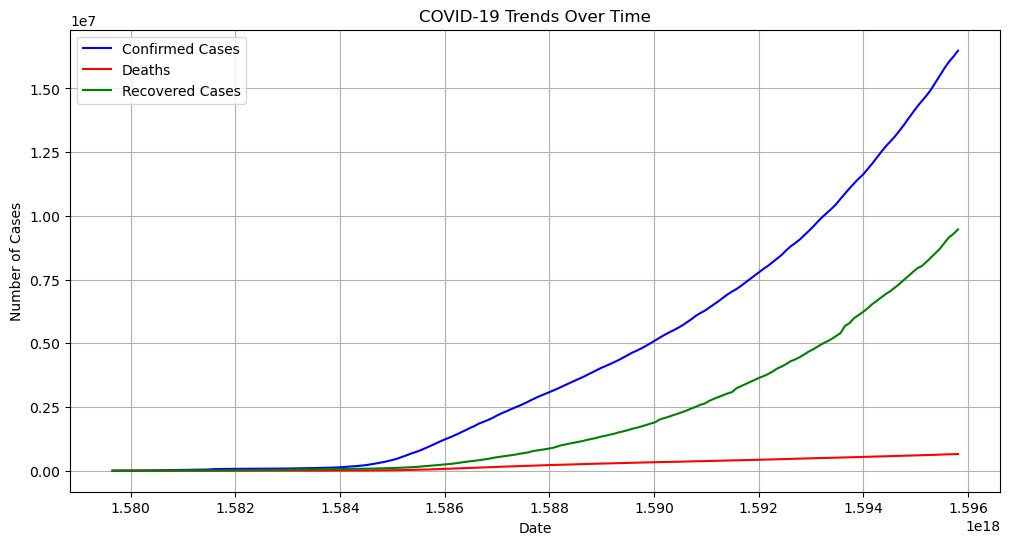

In [41]:
# Step 7: Group data by date and sum up the cases
df_date_grouped = df.groupby('Date').sum()

# Step 8: Plot trends
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df_date_grouped.index, df_date_grouped['Confirmed'], label='Confirmed Cases', color='blue')
plt.plot(df_date_grouped.index, df_date_grouped['Deaths'], label='Deaths', color='red')
plt.plot(df_date_grouped.index, df_date_grouped['Recovered'], label='Recovered Cases', color='green')
plt.title('COVID-19 Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend()
plt.grid(True)
plt.show()

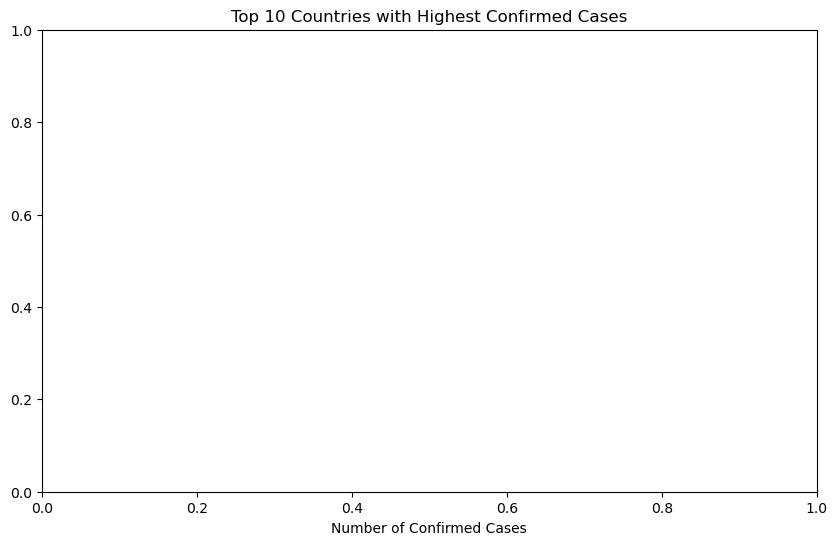

In [43]:
# Sum cases by country
top_countries = df.groupby('Country/Region')['Confirmed'].max().nlargest(10)

# Plot top 10 countries
plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title('Top 10 Countries with Highest Confirmed Cases')
plt.xlabel('Number of Confirmed Cases')
plt.show()

C:\Users\ADDIS\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ADDIS\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ADDIS\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ADDIS\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\ADDIS\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed t

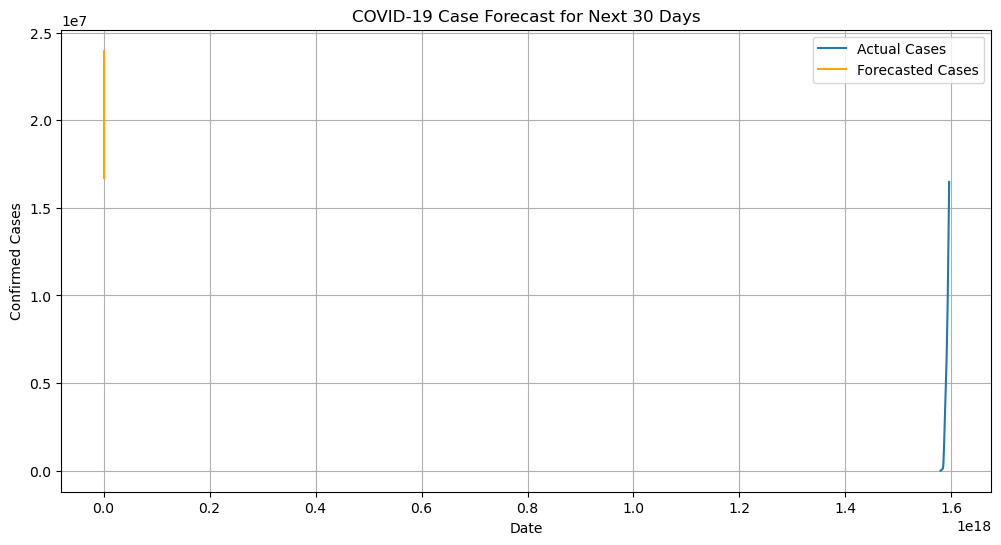

In [45]:
from statsmodels.tsa.arima.model import ARIMA

# Use time series data for Confirmed cases
df_timeseries = df_date_grouped['Confirmed']

# Train ARIMA model
model = ARIMA(df_timeseries, order=(5, 1, 0))
model_fit = model.fit()

# Forecast the next 30 days
forecast = model_fit.forecast(steps=30)

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(df_timeseries, label='Actual Cases')
plt.plot(forecast, label='Forecasted Cases', color='orange')
plt.title('COVID-19 Case Forecast for Next 30 Days')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.legend()
plt.grid(True)
plt.show()

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Create a classification target
df['High Cases'] = (df['Confirmed'] > 1000).astype(int)

# Select features and target
features = df[['Active', 'CFR', 'Recovery Rate']]
target = df['High Cases']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train Random Forest model
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
# Make predictions
y_pred = clf.predict(X_test)

# Evaluate model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("confusion Matrix:\n", confusion_matrix(y_test,y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6818
           1       0.99      0.99      0.99      2996

    accuracy                           1.00      9814
   macro avg       1.00      1.00      1.00      9814
weighted avg       1.00      1.00      1.00      9814

confusion Matrix:
 [[6803   15]
 [  17 2979]]
